In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Building Linear Regression from bottom
weight=0.7
baises=0.3
X=torch.arange(0,1,0.02).unsqueeze(dim=1)
Y=weight*X+baises
len(Y),len(X)

(50, 50)

In [3]:
X[:10],Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
# simplit split can be done morecomplexly with scikit-learn train_test_split
# but for now we are assuming simple split
split=int(0.8*len(X))
train_X,test_X,train_Y,test_Y=X[:split],X[split:],Y[:split],Y[split:]
len(train_X),len(train_Y)

(40, 40)

In [5]:
def plot_predictions(trx=train_X,trl='Training data',tx=test_X,tl='Testing data',ytr=train_Y,yt=test_Y,predictions=None):
    plt.figure(figsize=(10,7))
    if predictions is not None:
        plt.scatter(tx,predictions,c='r',label='predictions')
    plt.scatter(trx,ytr,c='b',label=trl)
    plt.scatter(tx,yt,c='g',label=tl)
    plt.legend()

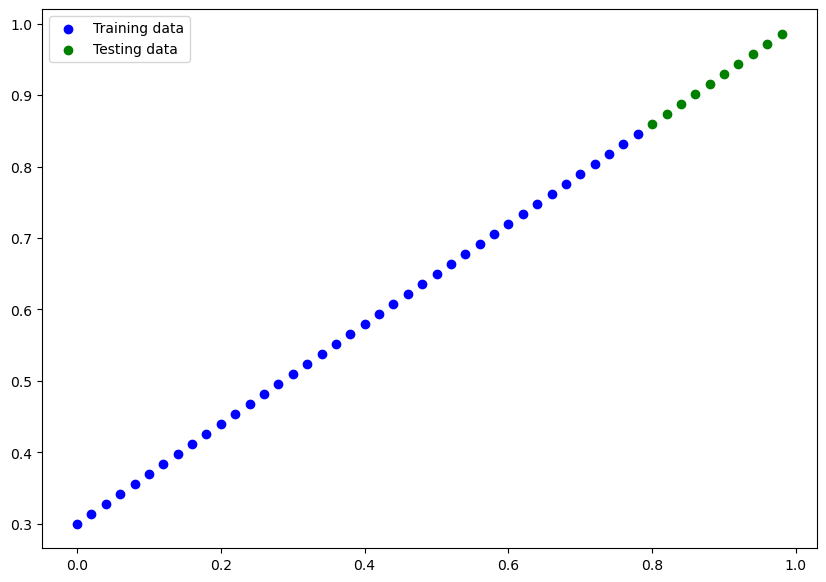

In [6]:
plot_predictions()

In [7]:
# Building pytorch class for the model
from torch import nn

class LinaerRegressionModel(nn.Module): #almost everyclass imports nn.module package in model building
    def __init__(self):
        super().__init__()
        self.weight=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) #Paramenetr since its afn
        self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) #. not parameter beca not a var
    
    def forward(self,x):
        return self.weight*x+self.bias

In [8]:
# creating a model is just intializing the class thats all!
RANDOM_SEED=42
torch.manual_seed(RANDOM_SEED)
model_0=LinaerRegressionModel()
print(list(model_0.parameters()))
print('\n',model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]

 OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [9]:
#Using our model for predictions
y_preds=model_0(test_X)
y_preds # you can see its tensor with AddBackwardfn() ,i.e., pytorch is calcultng its grad throughout the process
# which slows down the procs 

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [10]:
# so its always the case when calculating 
#So pytorch came up with Inference_mode() and no_grad() in this context grads won't be tracked
# when predicting we ue this 
with torch.inference_mode():
    y_preds=model_0(test_X)
y_preds # no grad fn or Backward tracking fn

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [11]:
# Same with the case of no_grad() fn but it is preferred to use inference_mode()
with torch.no_grad():
    y_preds=model_0(test_X)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

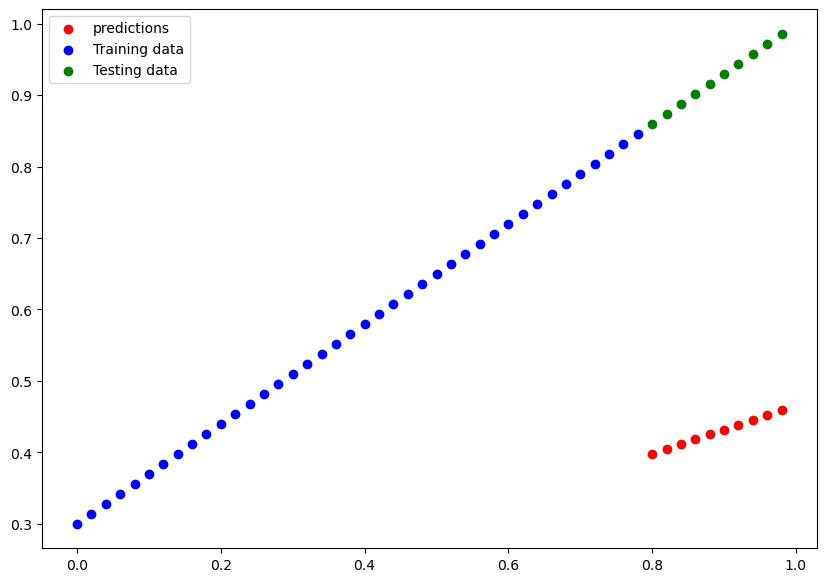

In [12]:
plot_predictions(predictions=y_preds)

In [13]:
# Training the model on higher case is adjusting the parameter random values with the help of training data
# So we need loss fn and optimiser

# LOSS fn tells us - The way we should see the loss
#     1. L1Loss - Just Mean of all the distance
#     2. L2Loss - Mean Square Error of the distances
#     3. CrossEntropyLoss - Tells the LogLoss of the classification pblm

# OPTIMIZERS fn tells us - The way we should change the parameters to lower the loss
#     1. SGD- Old but good and most claasical pblms used
#     2. ADAM - introduced in 2016 and mostly used after that

# All this models will be in nn package

In [14]:
#Loss fn
loss_fn=nn.L1Loss()
 
#optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01,) #learning rate is a hyperparameters
#params which thing should be changed as per loss.


In [15]:
#training the data
epoch_count=[]
train_loss_list=[]
test_loss_list=[]
torch.manual_seed(42)
epchos=100
for epcho in range(epchos):
    model_0.train() # 1.Set the model in train mode,  That activates params having req grads 
    y_pred=model_0(train_X) # 2. Forward Pass
    loss=loss_fn(y_pred,train_Y) # 3.Loss calculaiton
    optimizer.zero_grad() # 4.zeroing the prev loss with help of grad fn
    loss.backward() #5. BackPropagation on the loss wrt parameters of the model
    optimizer.step() #6. changes the values according to the step
    model_0.eval()
    if(epcho%10==0):
        test_pred=model_0(test_X)
        test_loss=loss_fn(test_pred,test_Y)
        epoch_count.append(epcho)
        test_loss_list.append(test_loss)
        train_loss_list.append(loss)
        print(f'Test-Loss : {test_loss}, Loss:{loss}')
        print(model_0.state_dict())
# model_0.eval() # 7. Brings Back model to testing mode so all dropout and batchnormalization wil be stopped
# model_0.state_dict()

Test-Loss : 0.48106518387794495, Loss:0.31288138031959534
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Test-Loss : 0.3463551998138428, Loss:0.1976713240146637
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
Test-Loss : 0.21729660034179688, Loss:0.08908725529909134
OrderedDict([('weight', tensor([0.4184])), ('bias', tensor([0.3333]))])
Test-Loss : 0.14464017748832703, Loss:0.053148526698350906
OrderedDict([('weight', tensor([0.4512])), ('bias', tensor([0.3768]))])
Test-Loss : 0.11360953003168106, Loss:0.04543796554207802
OrderedDict([('weight', tensor([0.4748])), ('bias', tensor([0.3868]))])
Test-Loss : 0.09919948130846024, Loss:0.04167863354086876
OrderedDict([('weight', tensor([0.4938])), ('bias', tensor([0.3843]))])
Test-Loss : 0.08886633068323135, Loss:0.03818932920694351
OrderedDict([('weight', tensor([0.5116])), ('bias', tensor([0.3788]))])
Test-Loss : 0.0805937647819519, Loss:0.03476089984178543
OrderedDict([('weight', tensor([0.

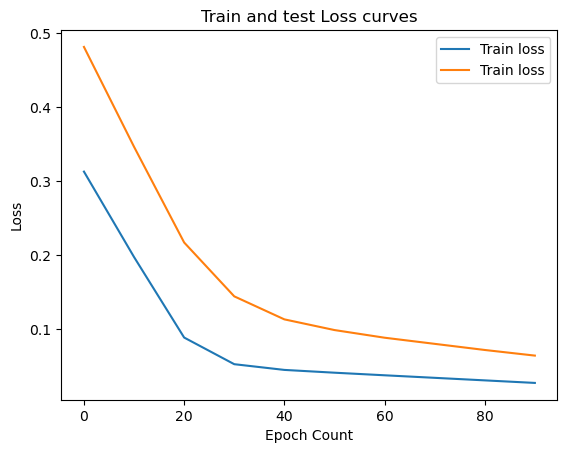

In [22]:
plt.plot(epoch_count,torch.tensor(train_loss_list).numpy(),label='Train loss')
plt.plot(epoch_count,torch.tensor(test_loss_list).numpy(),label='Train loss')
plt.xlabel('Epoch Count')
plt.ylabel('Loss')
plt.title('Train and test Loss curves')
plt.legend()
plt.show()

In [17]:
torch.tensor(train_loss_list).numpy()

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ],
      dtype=float32)

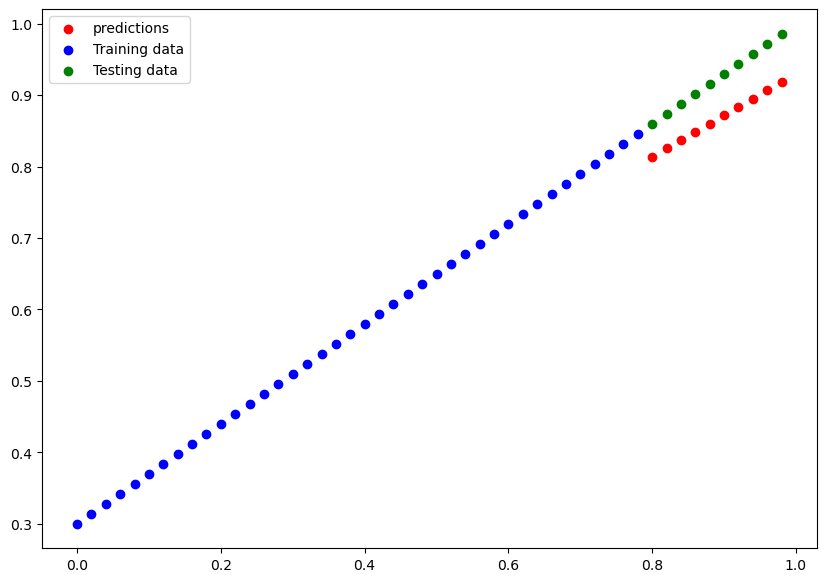

In [18]:
model_0.eval()
with torch.inference_mode():
    y_preds=model_0(test_X)
plot_predictions(predictions=y_preds)

In [24]:
"""
Saving model
    1.torch.save - Saves in pickle format i.e., python default saving type nothing with pytorch-its also used to save in 
                    dictionary save / or any tensor save also can be done.
    2.torch.nn.Module.load_state_dict - Load a state_dict type saved file
    3.torch.load - to deserialize pickle objs to files
"""
from pathlib import Path

#model directory creation
path=Path('saved_models')
path.mkdir(parents=True,exist_ok=True)

#model path and name
ModelPath=path/'LinearRegressionmodel.pth'

print(f'saving model to:{ModelPath}')
torch.save(obj=model_0.state_dict(),#only saves its parameters
           f=ModelPath
          )

saving model to:saved_models/LinearRegressionmodel.pth


In [26]:
# Checking the directory
import os
os.listdir(path)

['LinearRegressionmodel.pth']

In [29]:
!ls -lh 'saved_models/LinearRegressionmodel.pth'

-rw-r--r--  1 hemanththaluru  admin   1.1K Jun 26 20:27 saved_models/LinearRegressionmodel.pth
